<a href="https://colab.research.google.com/github/hyperkraz/MAT421/blob/main/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HW8**

***Problem 1***

Enter input:
 (forward, backward, or central)

central


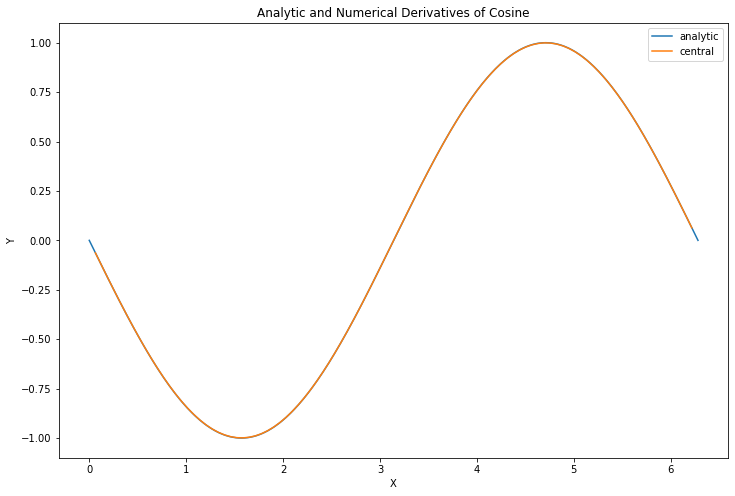

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def my_der_calc(f, a, b, N, option):
  n = N
  x = np.linspace(a, b, n)
  if option == "Forward":
    X = x[0:n-1]
    df = (f(x[1:n]) - f(x[0:n-1]))/(x[1:n]-x[0:n-1])
  elif option == "Backward":
    X = x[1:n]
    df = (f(x[1:n])-f(x[0:n-1]))/(x[1:n]-x[0:n-1])
  elif option == "Central":
    X=x[1:n-1]
    df = (f(x[2:n])-f(x[0:n-2]))/(x[2:n]-x[0:n-2])
  return df, X

def p_graph(df, X):
  plt.figure(figsize=(12, 8))
  plt.plot(x, -1*np.sin(x), label="analytic")
  plt.plot(X, df, label=option)
  plt.legend()
  plt.title("Analytic and Numerical Derivatives of Cosine")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.show

x = np.linspace(0, 2*np.pi, 1000)
f = lambda x:np.cos(x)
print("Enter input:\n (forward, backward, or central)\n")
option = input()

if option == "forward":
  [df, X] = my_der_calc(f, 0, 2*np.pi, 100, "Forward")
  p_graph(df, X)
elif option == "backward":
  [df, X] = my_der_calc(f, 0, 2*np.pi, 100, "Backward")
  p_graph(df, X)
elif option == "central":
  [df, X] = my_der_calc(f, 0, 2*np.pi, 100, "Central")
  p_graph(df, X)
else:
  print("Please enter a valid input.")

exit(1)



***Problem 2***

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def my_num_diff(f, a, b, n, option):
  x = np.linspace(a, b, n)
  if option == "forward":
    Xa = x[0:n-1]
    dya = (f(x[1:n])-f(x[0:n-1]))/(x[1:n]-x[0:n-1])
    return dya, Xa
  elif option == "backward":
    Xb = x[1:n]
    dyb = (f(x[1:n])-f(x[0:n-1]))/(x[1:n]-x[0:n-1])
    return dyb, Xb
  else:
    Xc = x[1:n-1]
    dyc = (f(x[2:n])-f(x[0:n-2]))/(x[2:n]-x[0:n-2])
    return dyc, Xc



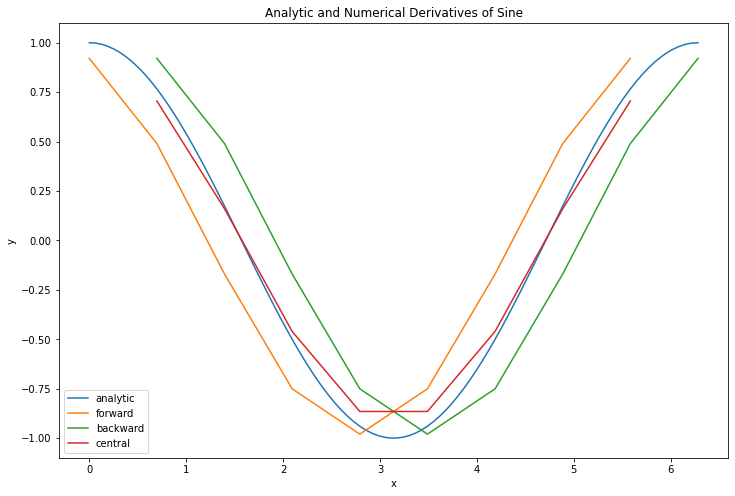

In [7]:
x = np.linspace(0, 2*np.pi, 100)
f = lambda x: np.sin(x)
[dyf, Xf] = my_num_diff(f, 0, 2*np.pi, 10, 'forward')
[dyb, Xb] = my_num_diff(f, 0, 2*np.pi, 10, 'backward')
[dyc, Xc] = my_num_diff(f, 0, 2*np.pi, 10, 'central')
plt.figure(figsize = (12, 8))
plt.plot(x, np.cos(x), label = 'analytic')
plt.plot(Xf, dyf, label = 'forward')
plt.plot(Xb, dyb, label = 'backward')
plt.plot(Xc, dyc, label = 'central')
plt.legend()
plt.title('Analytic and Numerical Derivatives of Sine')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

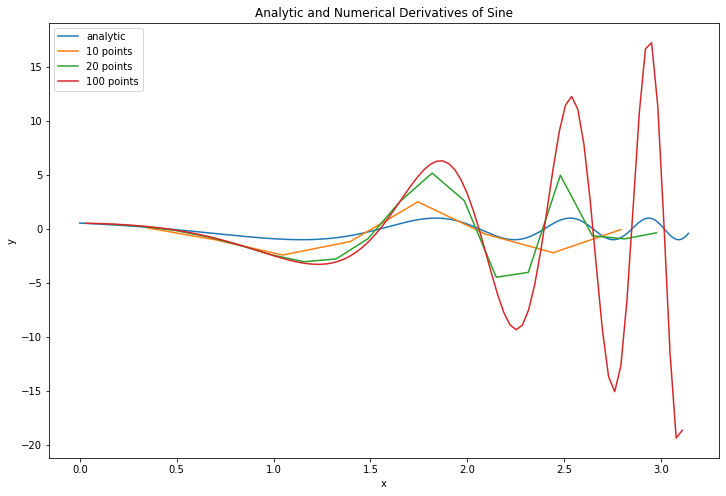

In [8]:
x = np.linspace(0, np.pi, 1000)
f = lambda x: np.sin(np.exp(x))
[dy10, X10] = my_num_diff(f, 0, np.pi, 10, 'central')
[dy20, X20] = my_num_diff(f, 0, np.pi, 20, 'central')
[dy100, X100] = my_num_diff(f, 0, np.pi, 100, 'central')
plt.figure(figsize = (12, 8))
plt.plot(x, np.cos(np.exp(x)), label = 'analytic')
plt.plot(X10, dy10, label = '10 points')
plt.plot(X20, dy20, label = '20 points')
plt.plot(X100, dy100, label = '100 points')
plt.legend()
plt.title('Analytic and Numerical Derivatives of Sine')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

***Problem 3***

In [9]:
import numpy as np
from numpy.lib.function_base import average
import matplotlib.pyplot as plt

def my_num_diff_w_smoothing(x, y, n):
  x_smooth = x[np.arange(n, len(x) - n, n)];

  def smoothD(x, y, n):
    discrete = np.arange(n + 1, len(y) - n, n)
    s = []
    for k in range(0, len(discrete)):
      i = discrete[k]
      s.append(average(y[np.arange(i - n - 1, i + n)]));
    return np.array(s)

  def cent_diff(y, h):
    dy = []
    for i in range(1, len(y) - 1):
      dy.append((y[i + 1] - y[i - 1])/(2*h));
    return np.array(dy)
  y_smooth = smoothD(x, y, n)
  X = x_smooth[np.arange(1, len(x_smooth) - 1)]
  h = (X[len(X) - 1] - X[0])/(len(X) - 1);
  dy = cent_diff(y_smooth, h);

  return(dy, X)


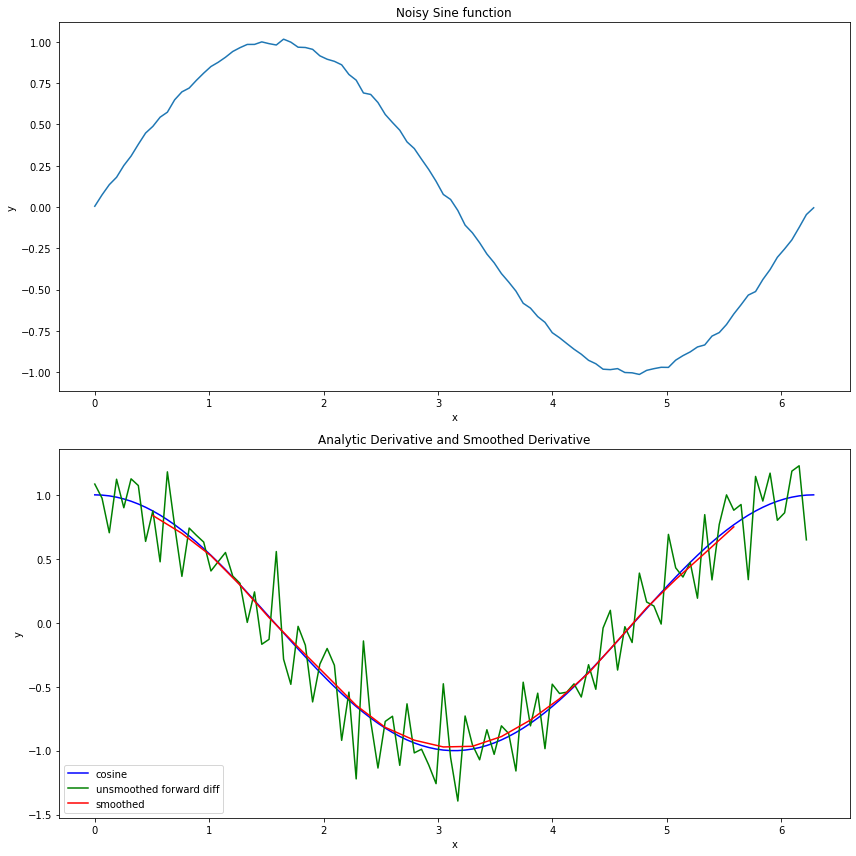

In [10]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.randn(len(x))/100
[dy, X] = my_num_diff_w_smoothing(x, y, 4)
plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.plot(x, y)
plt.title('Noisy Sine function')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(212)
plt.plot(x, np.cos(x), 'b', label = 'cosine')
plt.plot(x[:-1], (y[1:] - y[:-1])/(x[1]-x[0]), 'g', \
    label = 'unsmoothed forward diff')
plt.plot(X, dy, 'r', label = 'smoothed')
plt.title('Analytic Derivative and Smoothed Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()